# Connaître ses clients

Une des applications les plus courantes du KMeans est d’apprendre à connaître ses clients. Prenez un dataset très simple qui est Mall Customers pour essayer de découvrir des segmentations clients.


0. Importez les librairies usuelles 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

1. Importez votre dataset ```Mall_Customers.csv```

In [2]:
df=pd.read_csv("Mall_Customers.csv")

2. Enlevez la variable ```CustomerID``` de votre dataset 

In [3]:
df=df.drop("CustomerID",axis=1)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


3. Dummyfiez vos variables catégoriques 

In [4]:
df=pd.get_dummies(df, drop_first=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


4. Nous allons construire nos clusters mais pour cela, nous avons besoin de connaître le nombre optimum de clusters dont on a besoin. Utilisez tout d'abord la méthode ```Elbow``` pour voir si on peut voir combien il nous faudra prendre comme valeur pour ```k```

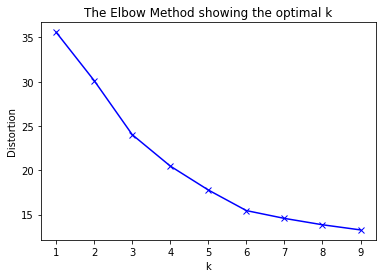

In [5]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

X=df
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



5. Utilisez ensuite la méthode _Silhouette_ pour voir si on peut affiner notre hypothèse pour ```k```

For n_clusters = 2 The average silhouette_score is : 0.29307334005502633
For n_clusters = 3 The average silhouette_score is : 0.383798873822341
For n_clusters = 4 The average silhouette_score is : 0.4052954330641215
For n_clusters = 5 The average silhouette_score is : 0.4440669204743007
For n_clusters = 6 The average silhouette_score is : 0.45205475380756527
For n_clusters = 7 The average silhouette_score is : 0.43949619264530887


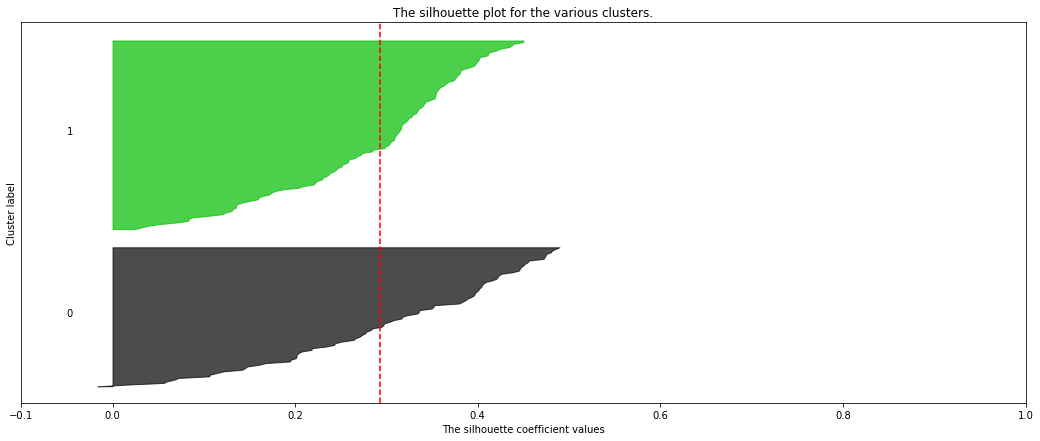

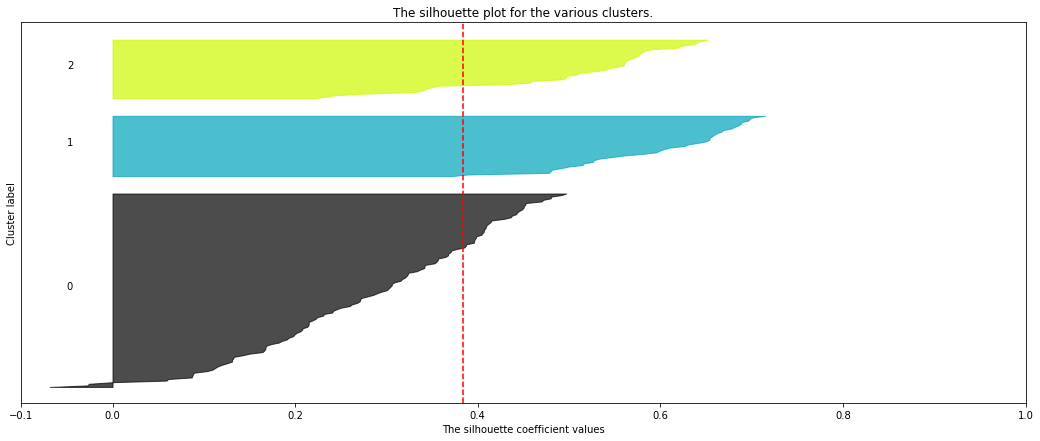

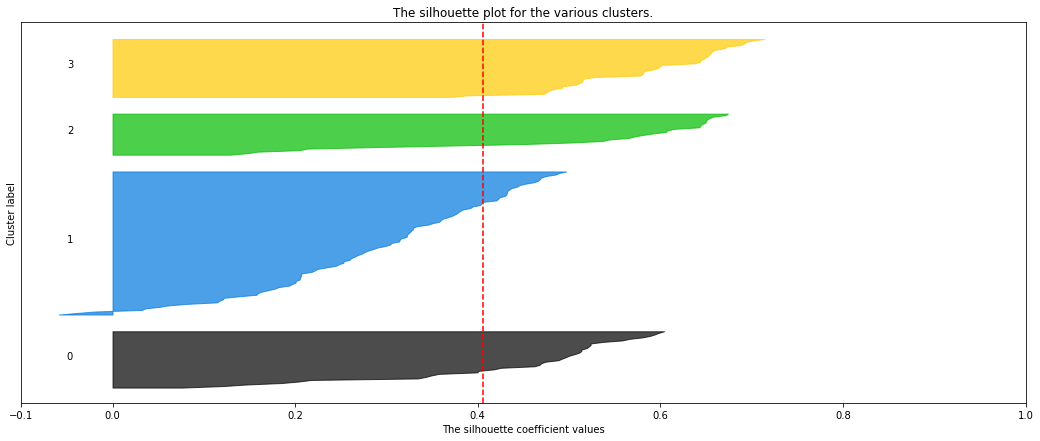

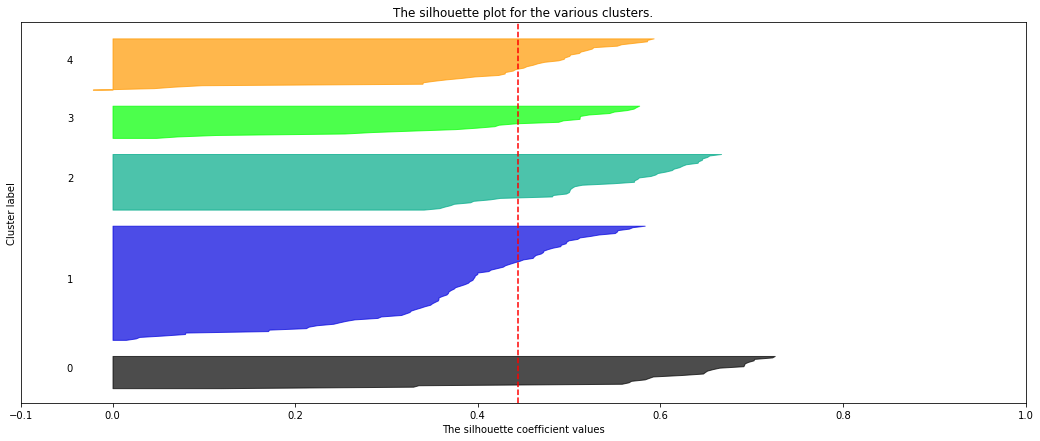

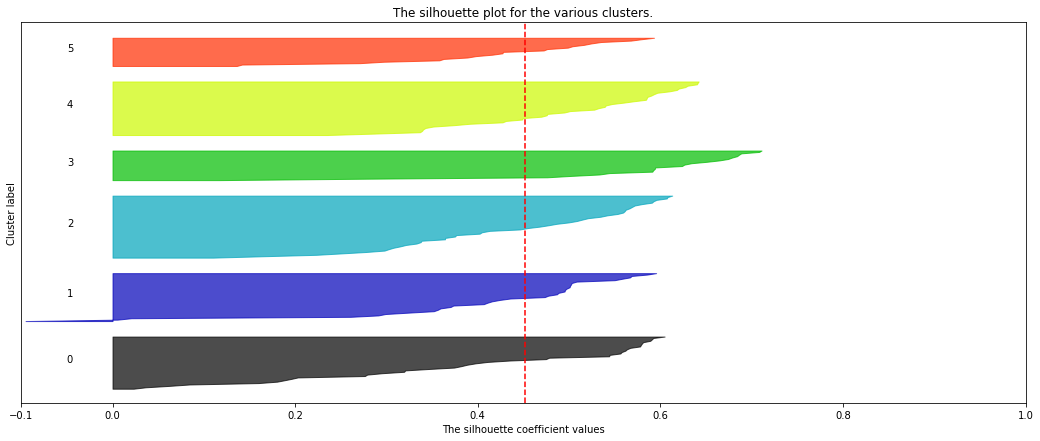

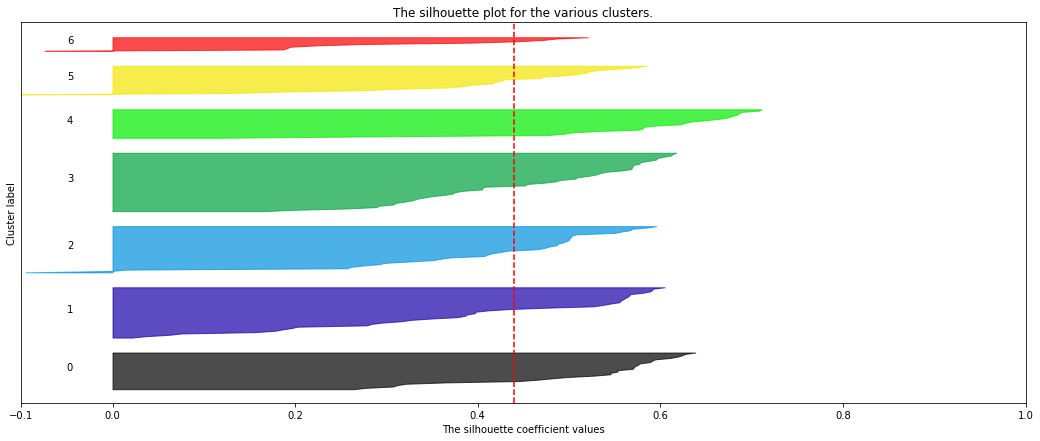

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


for n_clusters in range(2,8):
    # Create a subplot with 1 row and 1 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()



6. Pour la suite, nous allons prendre ```k=5``` clusters. Appliquez donc les KMeans sur votre dataset 

In [7]:
from sklearn.cluster import KMeans
k=KMeans(n_clusters=5)
k.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

7. Créeons un graphique qui nous permettra de visualiser chacun des clusters ainsi que leur centroïds. On prendra d'abord le ```Spending Score``` comme ordonnée et le ```Annual Income``` en abscisse 

In [8]:
df["Cluster"]=k.predict(df)

In [9]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male,Cluster
0,19,15,39,1,4
1,21,15,81,1,0
2,20,16,6,0,4
3,23,16,77,0,0
4,31,17,40,0,4


<Figure size 1440x648 with 0 Axes>

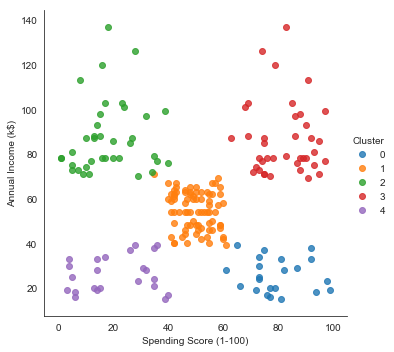

In [16]:
plt.figure(figsize=(20,9))
sb.lmplot(x="Spending Score (1-100)",y="Annual Income (k$)",hue="Cluster",legend=True,legend_out=True,fit_reg=False,data=df)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

facet = sns.lmplot(data=df, x="Spending Score (1-100)", y="Annual Income (k$)", hue='Cluster', 
                   fit_reg=False, legend=True, legend_out=True)

8. On a une jolie visualisation avec une belle séparation des clusters. Regardez cette fois la variable ```Age``` par rapport au ```Spending Score```. Que remarquez vous ?

<Figure size 1440x648 with 0 Axes>

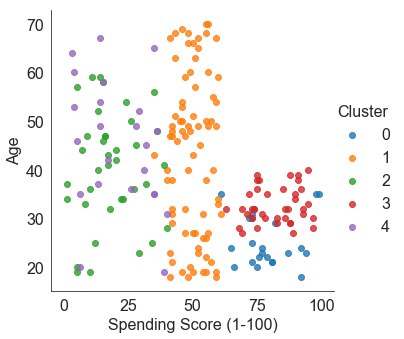

In [18]:
plt.rc('font', size=16)
plt.figure(figsize=(20,9))
sb.lmplot(x="Spending Score (1-100)",y="Age",hue="Cluster",legend=True,legend_out=True,fit_reg=False,data=df)

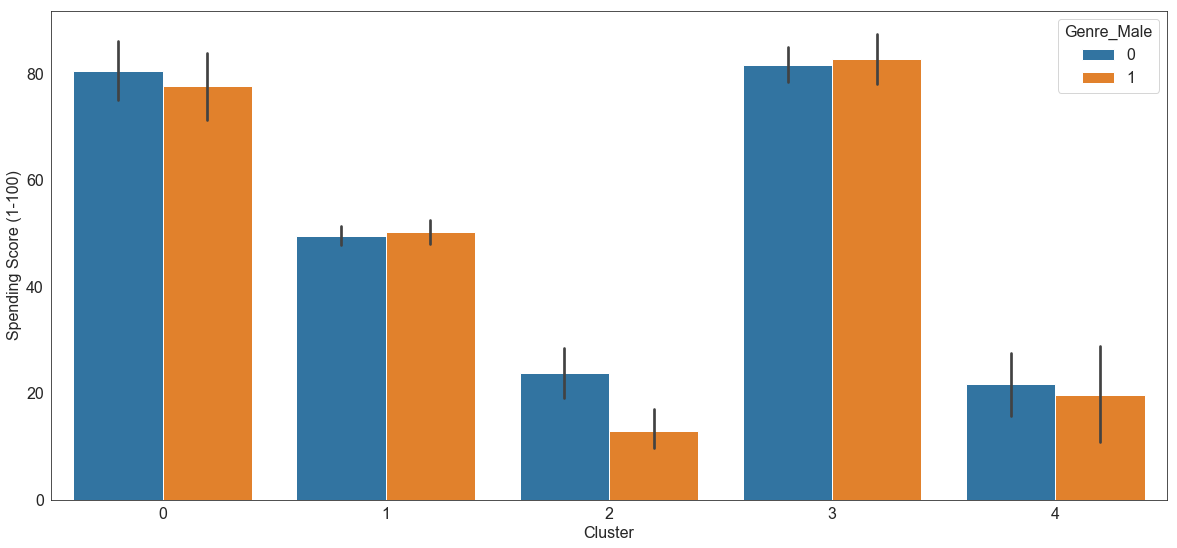

In [27]:
plt.rc('font', size=16)
plt.figure(figsize=(20,9))
sb.barplot(y="Spending Score (1-100)",x="Cluster",hue="Genre_Male",data=df)